### Traffic Sign Recognition Classifier

#### Load Data

In [1]:
# LOAD FILES FOR TRAFFIC SIGN IMAGE DATA
# Import Modules
import pickle
import os
import pickle
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.signal import find_peaks_cwt
import random
from sklearn.utils import shuffle
import csv
%matplotlib inline

# Load Image Directory
os.chdir('..')
OS=str(os.getcwd())
os.chdir(OS+'/Data')

# Load Training and Testing Data
TrainingFile='train.p'
TestingFile='test.p'
with open(TrainingFile,mode='rb') as f:
    Train=pickle.load(f)
with open(TestingFile,mode='rb') as f:
    Test=pickle.load(f)

# Load Features and Labels    
XTrain,YTrain=Train['features'],Train['labels']
XTest,YTest=Test['features'],Test['labels'] 


# Load Traffic Sign Names from CSV File
Signnames=[]
with open('signnames.csv', newline='') as csvfile:
    CSVReader=csv.reader(csvfile)
    next(CSVReader)
    for row in CSVReader:
        Signnames.append(row[1])
        
# Change Directory
os.chdir('..')

#### Dataset Summary & Exploration


In [2]:
# DATASET EXPLORATION 
# Number of Training Examples
NumTrain=len(XTrain)

# Number of Testing Examples
NumTest=len(XTest)

# Shape of Traffic Sign Images? Assuming Image Size is Constant
ImageShape=XTrain[0].shape

# Number of Unique Classes and Labels
NumClass=len(set(YTrain))

print("Number of Training Examples="+str(NumTrain))
print("Number of Testing Examples="+str(NumTest))
print("Image Data Shape="+str(ImageShape))
print("Number of Classes="+str(NumClass))

Number of Training Examples=39209
Number of Testing Examples=12630
Image Data Shape=(32, 32, 3)
Number of Classes=43


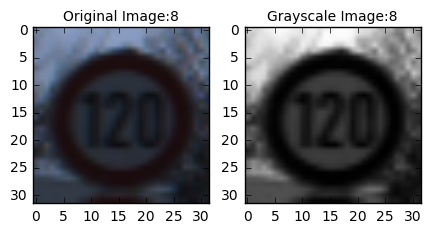

In [3]:
# DATA EXPLORATION 
# Select a Random Image to Visualize
Index=random.randint(0,NumTrain)
Image=XTrain[Index]

# Convert to Grayscale Image
Gray=cv2.cvtColor(Image,cv2.COLOR_BGR2GRAY)
    
# Plot
Fig,(Axis1,Axis2)=plt.subplots(1,2,figsize=(5,5))
Axis1.imshow(Image)
Axis2.imshow(Gray,cmap='gray')
Axis1.set_title('Original Image:'+str(YTrain[Index]),fontsize=10)
Axis2.set_title('Grayscale Image:'+str(YTrain[Index]),fontsize=10)

/home/umer/Anaconda/envs/Udacity-Self-Driving-Car/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


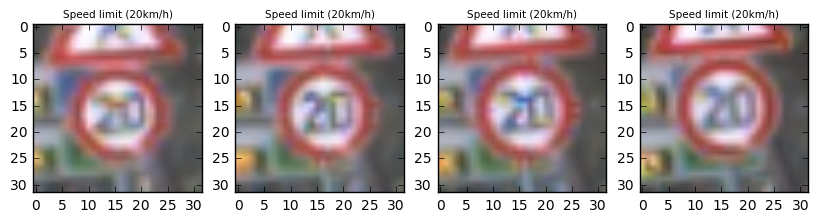

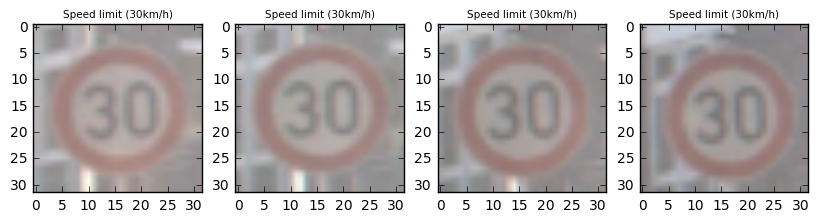

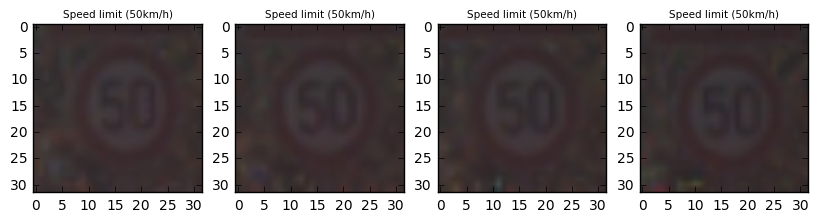

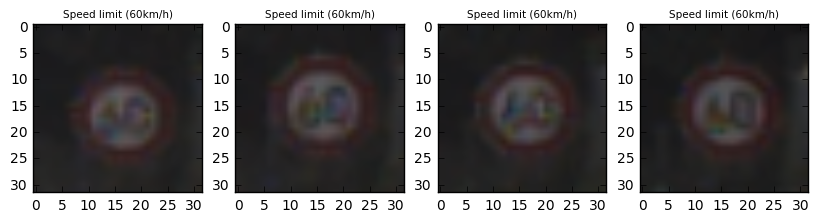

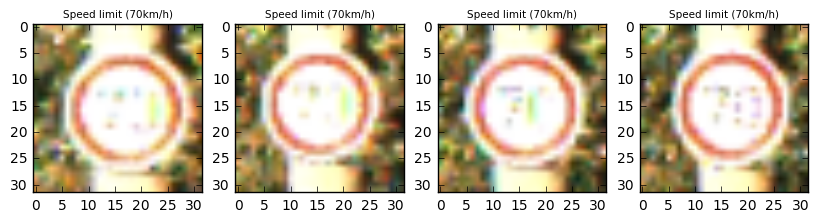

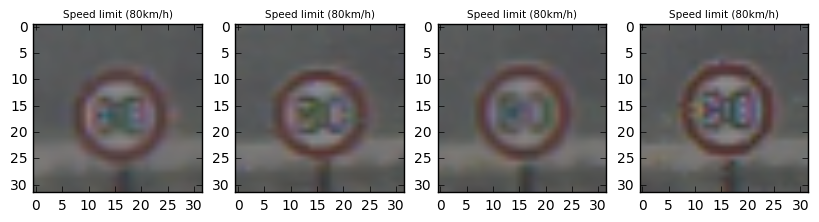

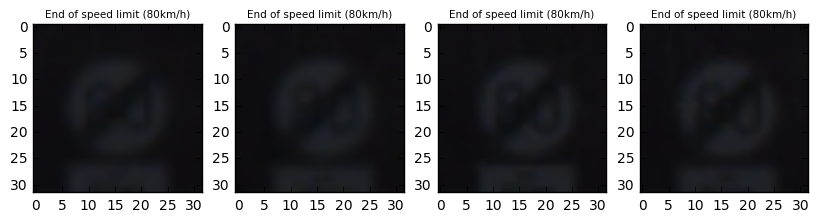

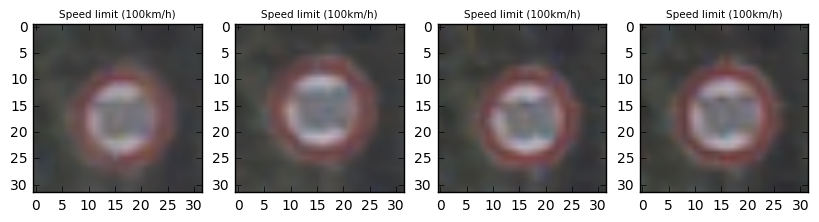

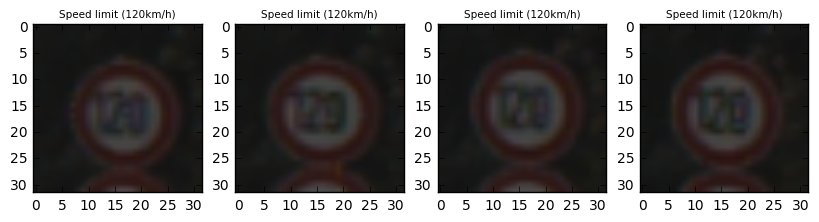

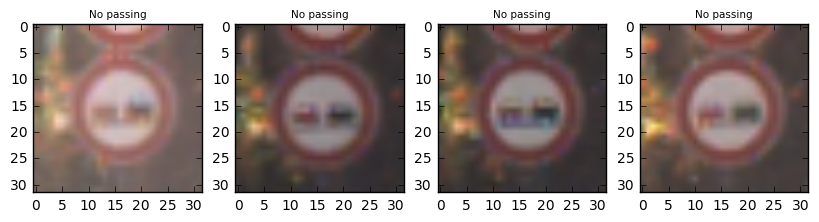

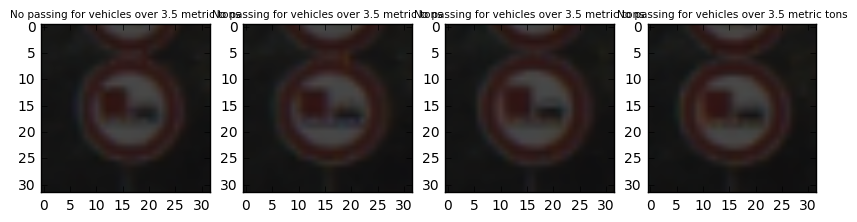

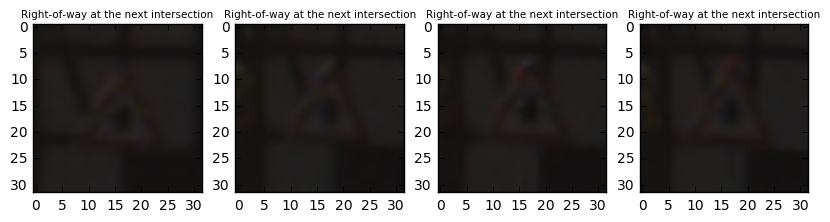

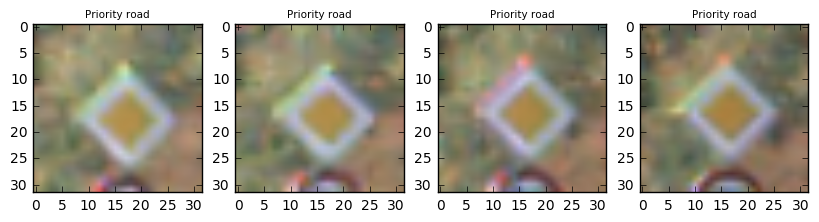

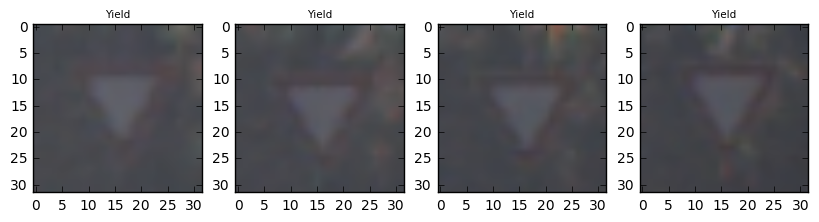

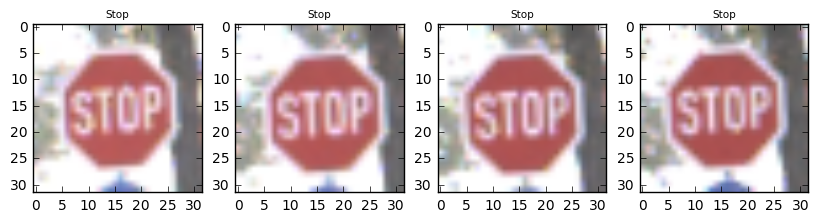

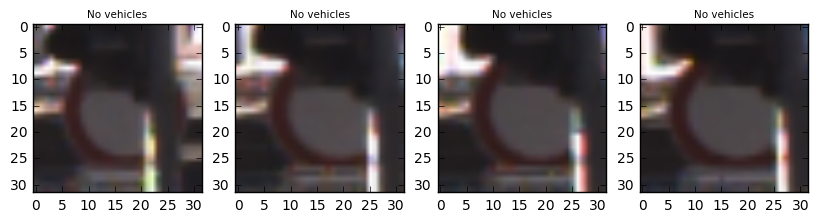

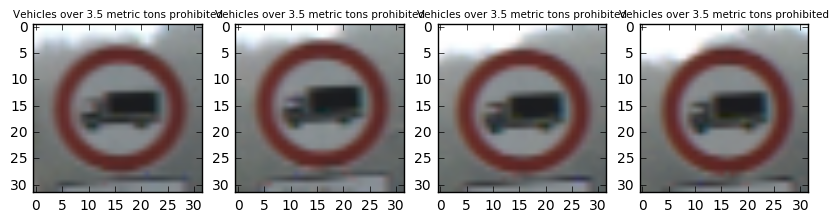

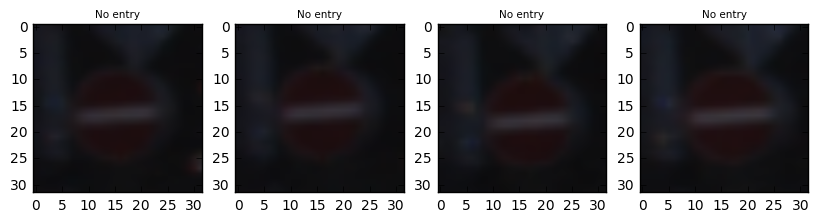

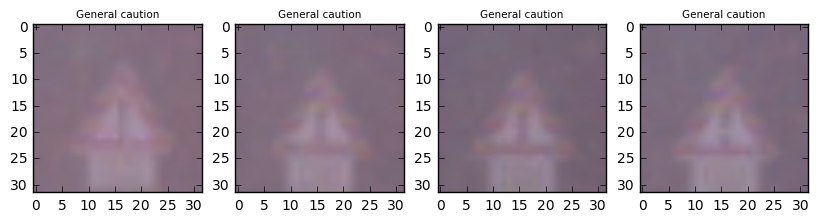

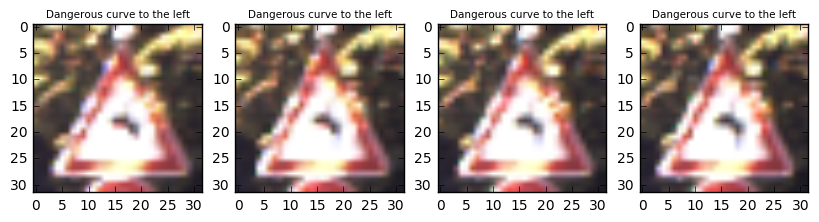

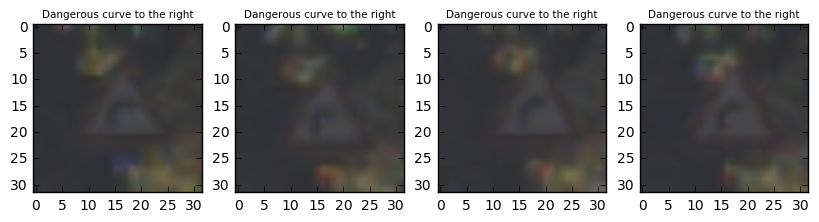

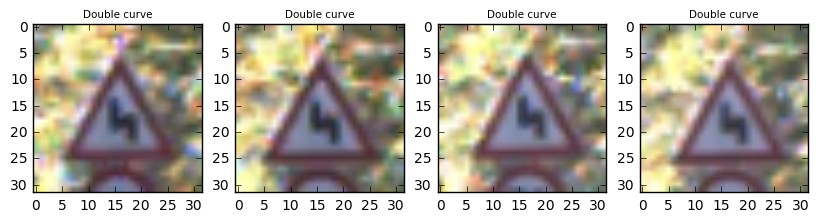

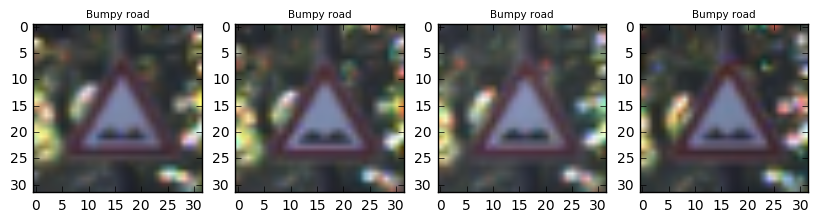

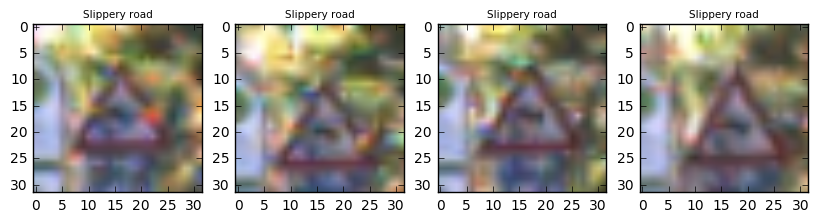

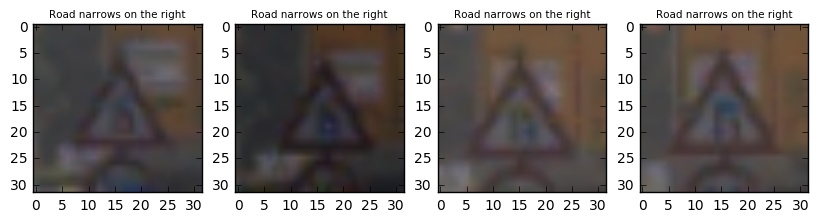

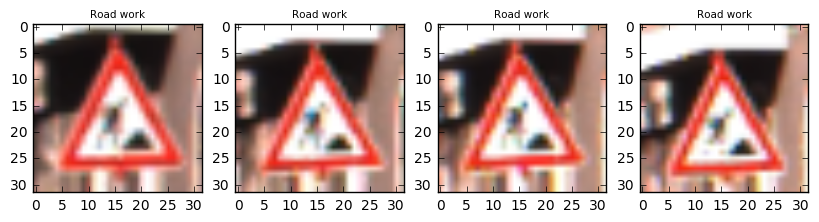

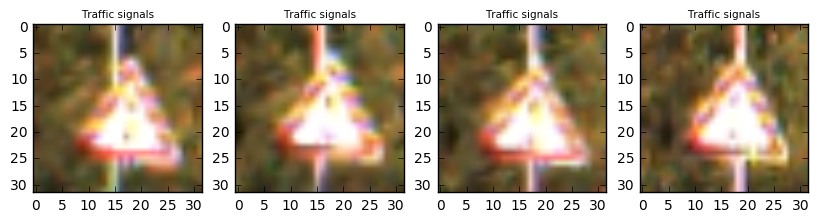

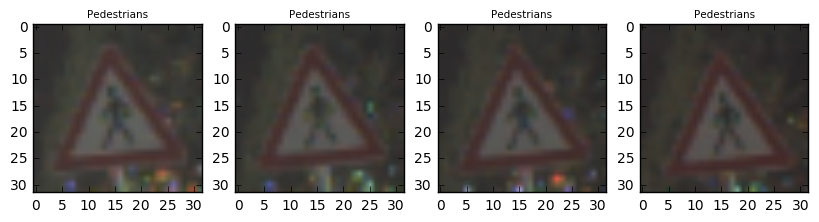

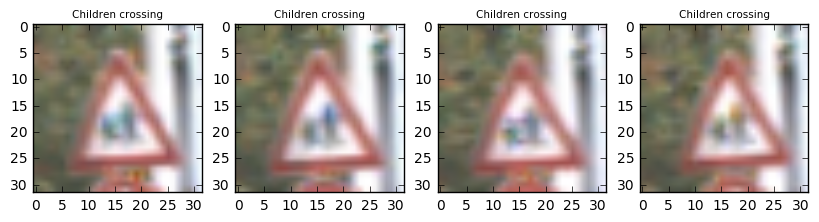

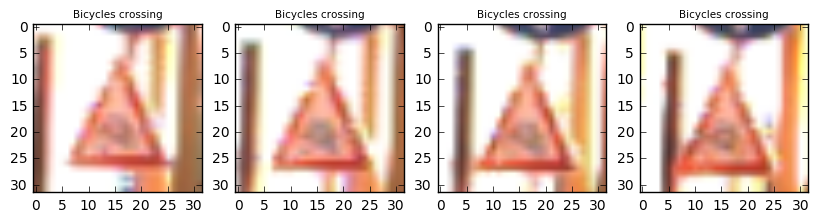

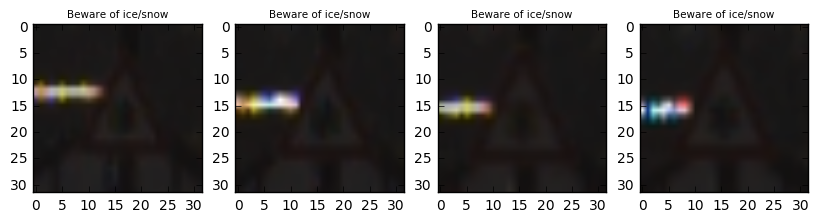

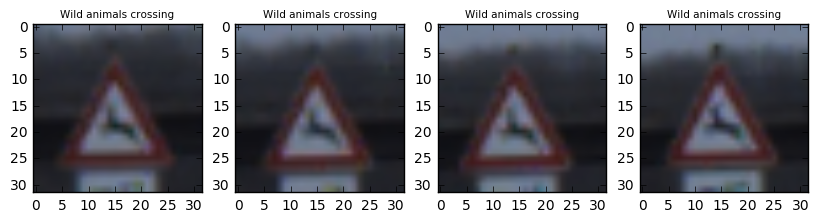

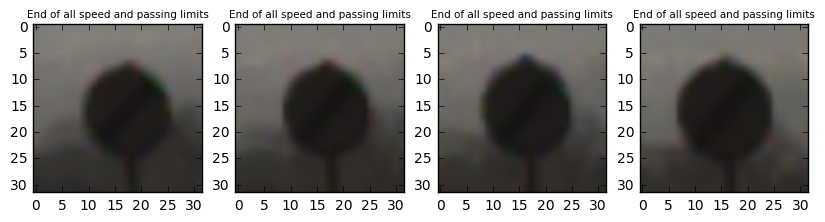

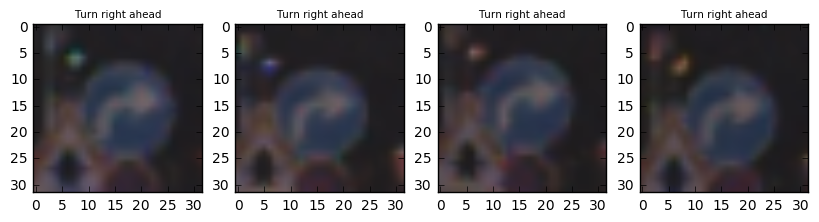

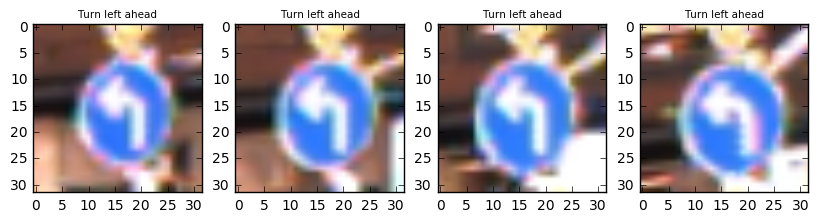

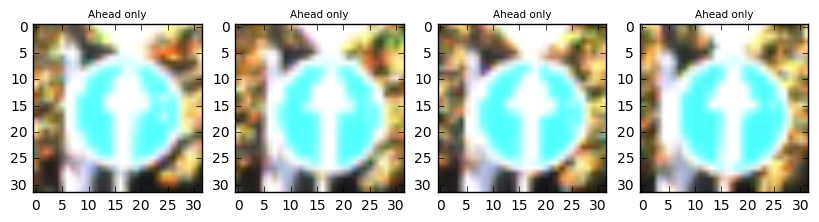

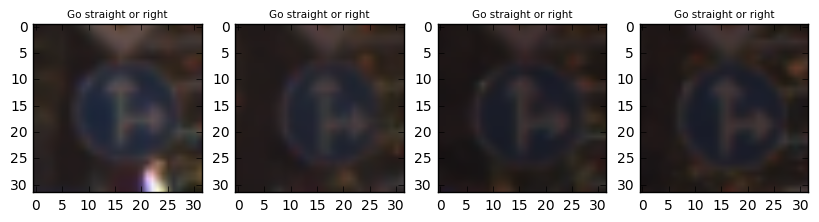

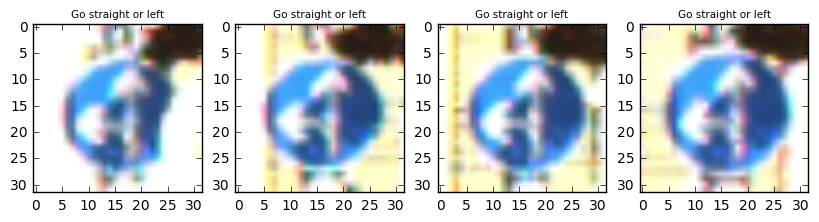

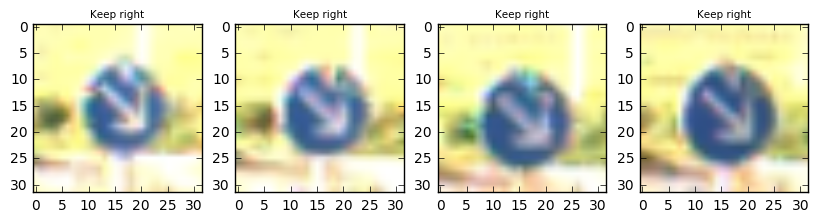

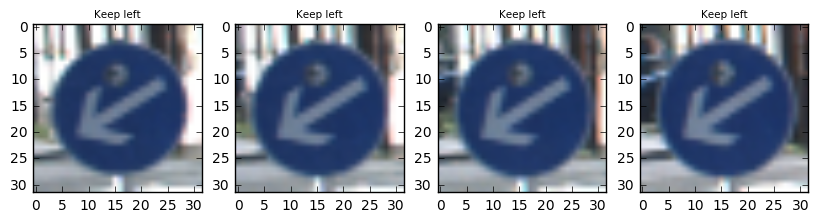

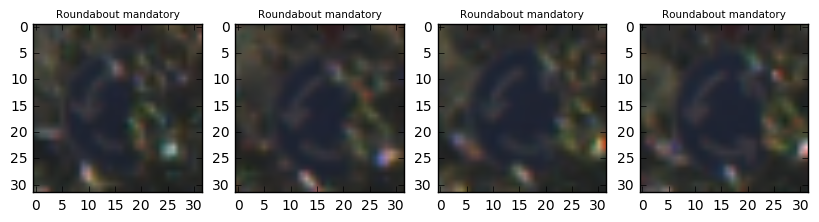

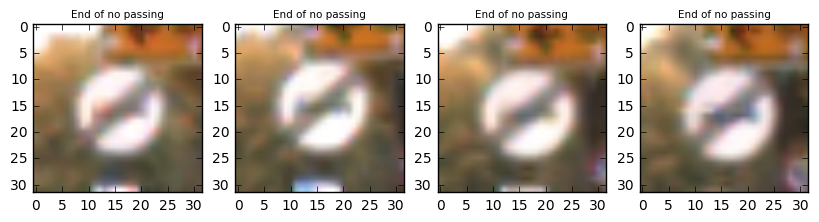

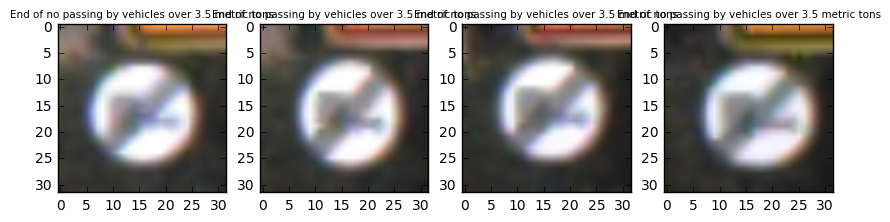

In [4]:
# DATA EXPLORATION 
# Plot 3 Occurances of All Signs
for i in range(NumClass):
    Fig,(Axis1,Axis2,Axis3,Axis4)=plt.subplots(1,4,figsize=(10,10))
    Indices=np.nonzero(YTrain==i)[0][0:4]
    Axis1.imshow(XTrain[Indices[0]])
    Axis1.set_title(Signnames[i],fontsize=7.5)
    Axis2.imshow(XTrain[Indices[1]])
    Axis2.set_title(Signnames[i],fontsize=7.5)
    Axis3.imshow(XTrain[Indices[2]])
    Axis3.set_title(Signnames[i],fontsize=7.5)
    Axis4.imshow(XTrain[Indices[3]])
    Axis4.set_title(Signnames[i],fontsize=7.5)

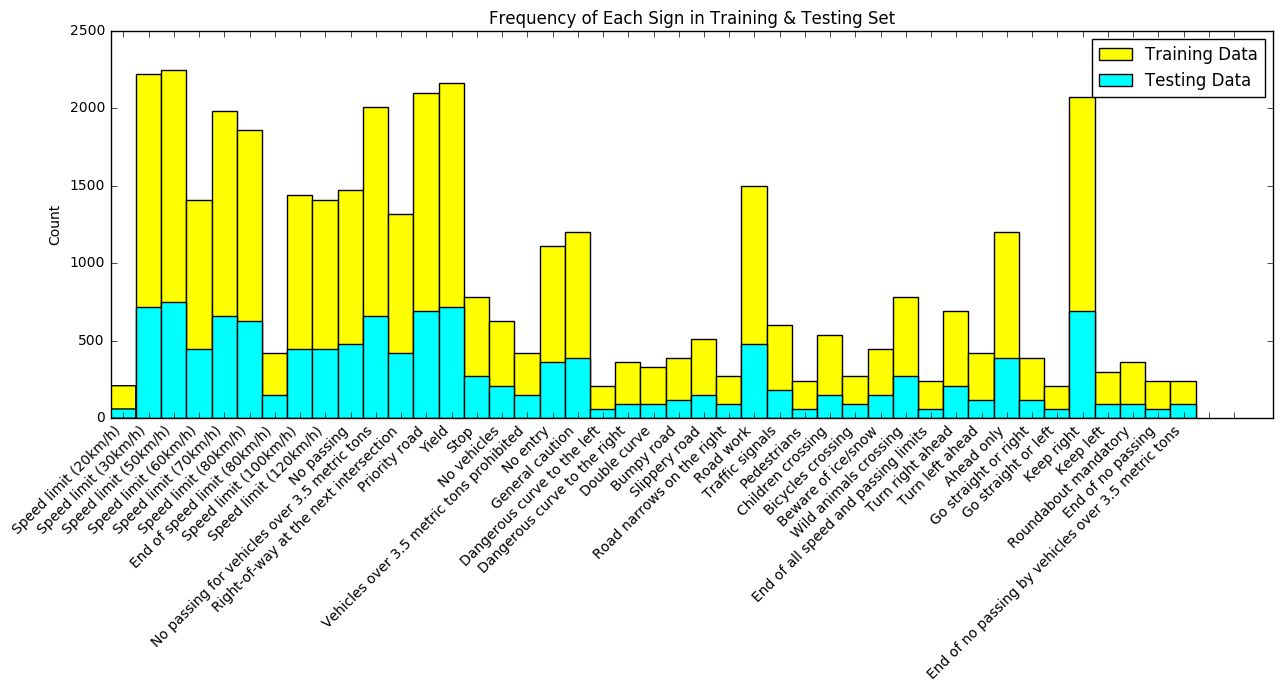

In [5]:
# DATA EXPLORATION 
# Plot the Histograms for Training and Testing Data
plt.figure(figsize=(15,5))
plt.hist(YTrain,bins=NumClass,label='Training Data',color='yellow')
plt.hist(YTest,bins=NumClass,label='Testing Data',color='cyan')
plt.title('Frequency of Each Sign in Training & Testing Set')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.xticks(np.arange(0.5,NumClass+0.5,0.977),Signnames,ha='right',rotation=45)
plt.show()

#### Data Preprocessing


In [6]:
# DATA PREPROCESSING
# Shuffle the Data
XTrain,YTrain=shuffle(XTrain,YTrain)
XTest,YTest=shuffle(XTest,YTest)
print('Training and Testing Data Shuffled')

Training and Testing Data Shuffled


In [7]:
# DATA PREPROCESSING
# Add Validation Data
from sklearn.cross_validation import train_test_split
XTrain,XValidation,YTrain,YValidation=train_test_split(XTrain,YTrain,
                                                                 test_size=0.05,
                                                                 random_state=832289)

print('Training Data Randomized and Split for Validation')
print('Training Data Size:'+str(XTrain.shape))
print('Validation Data Size:'+str(XValidation.shape))

Training Data Randomized and Split for Validation
Training Data Size:(37248, 32, 32, 3)
Validation Data Size:(1961, 32, 32, 3)


#### Model Architecture

In [8]:
# DEFINE ARCHITECTURE
# Import Tensorflow
import tensorflow as tf
from tensorflow.contrib.layers import flatten

In [9]:
# DEFINE ARCHITECTURE
# Set Epochs and Batch Size
Epochs=20
BatchSize=128

In [10]:
# DEFINE LENET ARCHITECTURE
def LeNet(X):
    # Set Mu and Sigma 
    Mu=0
    Sigma=0.1
    
    # Layer 01: Convolutional.
    # Input=32x32x3. 
    # Output=28x28x(Feature Number).
    
    # Set Layer 01 Parameters
    Channel=3 
    FeatureNum01=50 
    LocalSize01=5
    
    # Set Layer 01 Network
    W1=tf.Variable(tf.truncated_normal(shape=(LocalSize01,LocalSize01,Channel,FeatureNum01),mean=Mu,stddev=Sigma))
    B1=tf.Variable(tf.zeros(FeatureNum01))
    Conv1=tf.nn.conv2d(X,W1,strides=[1,1,1,1],padding='VALID')+B1
    
    # Set Layer 01 Activation
    Conv1=tf.nn.relu(Conv1)

    # Do Pooling. Input=28x28x(Feature Number). Output=14x14x(Feature Number).
    Conv1=tf.nn.max_pool(Conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

    # Layer 02: Convolutional.
    # Output=10x10x(Feature Number).
    FeatureNum02=80
    LocalSize02=5
    
    # Set Layer 01 Network
    W2=tf.Variable(tf.truncated_normal(shape=(LocalSize02,LocalSize02,FeatureNum01,FeatureNum02),
                                       mean=Mu,stddev=Sigma))
    B2=tf.Variable(tf.zeros(FeatureNum02))
    Conv2=tf.nn.conv2d(Conv1,W2,strides=[1,1,1,1],padding='VALID')+B2
    
    # Set Layer 02 Activation
    Conv2=tf.nn.relu(Conv2)

    # Do Pooling. Input=10x10x(FeatureNumber). Output=5x5x(Feature Number).
    Conv2=tf.nn.max_pool(Conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

    # Perform Flattening. Input=5x5x(Feature Number).
    Flat=flatten(Conv2)
    
    # Layer 03: Fully Connected. 
    # One-Dimensional Input=5x5x(FeatureNumber). One-Dimensional Output=120.
    FeatureNum03=120
    
    # Set Layer 03 Network
    W3=tf.Variable(tf.truncated_normal(shape=(LocalSize02*LocalSize02*FeatureNum02,FeatureNum03),
                                       mean=Mu,stddev=Sigma))
    B3=tf.Variable(tf.zeros(120))
    N3=tf.add(tf.matmul(Flat,W3),B3)
    
    # Set Layer 03 Activation
    N3=tf.nn.relu(N3)

    # Layer 04: Fully Connected.
    # Input=120. Output=80.
    FeatureNum04=80
    
    # Set Layer 04 Network
    W4=tf.Variable(tf.truncated_normal(shape=(FeatureNum03,FeatureNum04),mean=Mu,stddev=Sigma))
    B4=tf.Variable(tf.zeros(FeatureNum04))
    N4=tf.add(tf.matmul(N3,W4),B4)
    
    # Set Layer 04 Activation
    N4=tf.nn.relu(N4)

    # Layer 05: Fully Connected. 
    # Input=84. Output=NumClass.
    OutputNum=43
    
    # Set Layer 05 Network
    W5=tf.Variable(tf.truncated_normal(shape=(FeatureNum04,OutputNum),mean=Mu,stddev=Sigma))
    B5=tf.Variable(tf.zeros(OutputNum))
    Logits=tf.add(tf.matmul(N4,W5),B5)
      
    return Logits,Conv1,Conv2

#### Train, Validate and Test the Model

In [11]:
# PERFORM TRAINING
# Set Placeholder
X=tf.placeholder(tf.float32,(None,32,32,3))
Y=tf.placeholder(tf.int32,(None))
OneHotY=tf.one_hot(Y,NumClass)
print("Setting Placeholder")

Setting Placeholder


In [12]:
# PERFORM TRAINING
# Set Training Pipeline
Rate=0.001
Logits,Conv1,Conv2=LeNet(X)
CrossEntropy=tf.nn.softmax_cross_entropy_with_logits(logits=Logits,labels=OneHotY)
LossOperation=tf.reduce_mean(CrossEntropy)
Optimizer=tf.train.AdamOptimizer(learning_rate=Rate)
TrainingOperation=Optimizer.minimize(LossOperation)
print("Setting Training Pipeline")

Setting Training Pipeline


In [13]:
# MODEL EVALUATION
# Initialize Evaluation
CorrectPrediction=tf.equal(tf.argmax(Logits,1),tf.argmax(OneHotY,1))
AccuracyOperation=tf.reduce_mean(tf.cast(CorrectPrediction,tf.float32))
Saver=tf.train.Saver()

# Define Evaluation 
def Evaluate(XData,YData):
    NumExamples=len(XData)
    TotalAccuracy=0
    Sess=tf.get_default_session()
    for Offset in range(0,NumExamples,BatchSize):
        BatchX,BatchY=XData[Offset:Offset+BatchSize],YData[Offset:Offset+BatchSize]
        Accuracy=Sess.run(AccuracyOperation,feed_dict={X:BatchX,Y:BatchY})
        TotalAccuracy+=(Accuracy*len(BatchX))
    return TotalAccuracy/NumExamples

In [14]:
# TRAIN AND TEST 
# Use Session to Test Model
with tf.Session() as Sess:
    Sess.run(tf.global_variables_initializer())
    NumExamples=len(XTrain)
    print("Training...")
    for i in range(Epochs):
        XTrain,YTrain=shuffle(XTrain,YTrain)
        for Offset in range(0,NumExamples,BatchSize):
            End=Offset+BatchSize
            BatchX,BatchY=XTrain[Offset:End],YTrain[Offset:End]
            Sess.run(TrainingOperation,feed_dict={X:BatchX,Y:BatchY})
            
        ValidationAccuracy=Evaluate(XValidation,YValidation)
        print("Epoch {} ...".format(i+1))
        print("Validation Accuracy={:.3f}".format(ValidationAccuracy))
        
    Saver.save(Sess,'./Model/Lenet')
    print("Model Saved")

Training...
Epoch 1 ...
Validation Accuracy=0.448
Epoch 2 ...
Validation Accuracy=0.693
Epoch 3 ...
Validation Accuracy=0.806
Epoch 4 ...
Validation Accuracy=0.873
Epoch 5 ...
Validation Accuracy=0.902
Epoch 6 ...
Validation Accuracy=0.935
Epoch 7 ...
Validation Accuracy=0.936
Epoch 8 ...
Validation Accuracy=0.954
Epoch 9 ...
Validation Accuracy=0.954
Epoch 10 ...
Validation Accuracy=0.963
Epoch 11 ...
Validation Accuracy=0.955
Epoch 12 ...
Validation Accuracy=0.963
Epoch 13 ...
Validation Accuracy=0.967
Epoch 14 ...
Validation Accuracy=0.985
Epoch 15 ...
Validation Accuracy=0.972
Epoch 16 ...
Validation Accuracy=0.958
Epoch 17 ...
Validation Accuracy=0.978
Epoch 18 ...
Validation Accuracy=0.963
Epoch 19 ...
Validation Accuracy=0.976
Epoch 20 ...
Validation Accuracy=0.979
Model Saved


In [15]:
# EVALUATE ON TEST DATA
# Run Session to Classify Images on Test Data
with tf.Session() as Sess:
    Saver.restore(Sess,'Model/Lenet')
    Classify=Sess.run(AccuracyOperation,feed_dict={X:XTest,Y:YTest})
    print("Test Accuracy={:.3f}".format(Classify))

Test Accuracy=0.914


#### Test Model on New Images

In [16]:
# LOAD AND TEST IMAGES
# Load Test Images and Classes
XTestNames=['Test-Images/3.jpg','Test-Images/12.jpg','Test-Images/13.jpg','Test-Images/17.jpg',
            'Test-Images/37.jpg','Test-Images/38.jpg']
YTest=[3,12,13,17,37,38]
YTest=np.asarray(YTest)

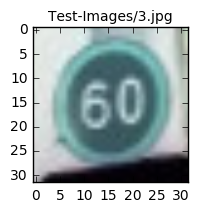

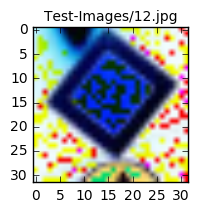

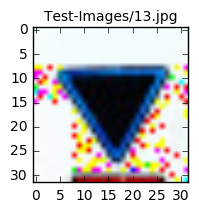

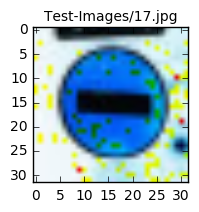

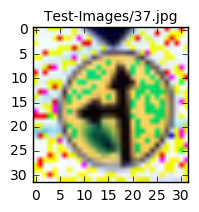

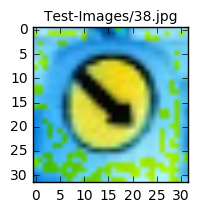

In [17]:
# LOAD AND TEST IMAGES
# Plot for Each Image
XTest=np.zeros((len(YTest),32,32,3),dtype=np.float)
for i in range(0,len(XTestNames)):
    Image=plt.imread(XTestNames[i])
    XTest[i]=Image
    plt.figure(figsize=(2,2))
    plt.imshow(XTest[i])
    plt.title(XTestNames[i],fontsize=10)

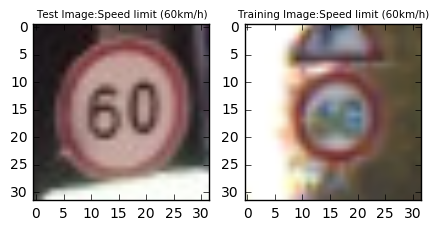

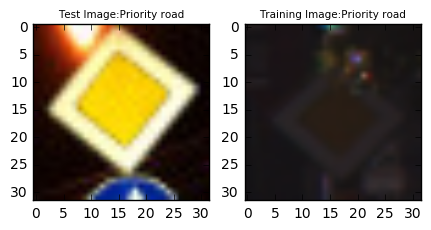

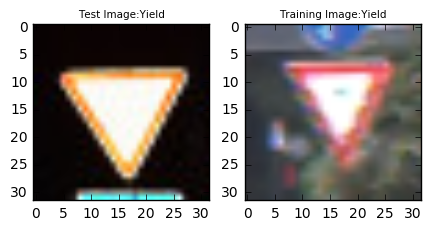

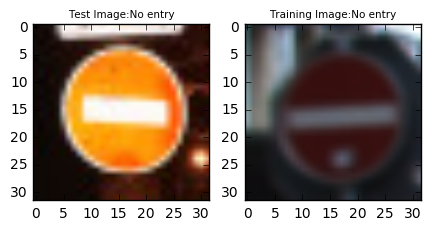

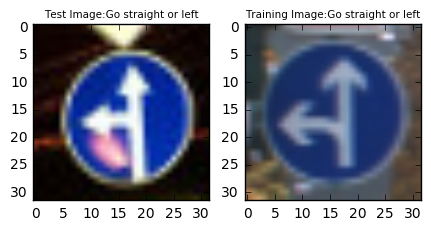

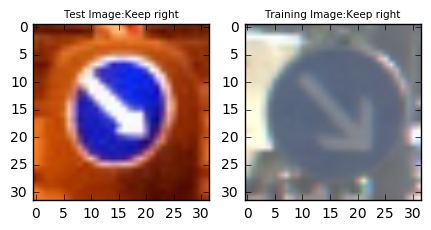

In [18]:
# LOAD AND TEST IMAGES
# Compare Test Images with Training Data Images
for i in range(0,len(XTestNames)):
    # Load Images
    TestImage=plt.imread(XTestNames[i])
    TrainingImage=XTrain[np.nonzero(YTrain==YTest[i])[0][0]]
 
    # Plot
    Fig,(Axis1,Axis2)=plt.subplots(1,2,figsize=(5,5))
    Axis1.imshow(TestImage)
    Axis2.imshow(TrainingImage)
    Axis1.set_title('Test Image:'+Signnames[YTest[i]],fontsize=7.5)
    Axis2.set_title('Training Image:'+Signnames[YTest[i]],fontsize=7.5)

In [ ]:
# LOAD AND TEST IMAGES
# Run Session to Classify Images
with tf.Session() as Sess:
    # Load Model
    Saver.restore(Sess,'Model/Lenet')
    # Classify
    Classify=Sess.run(AccuracyOperation,feed_dict={X:XTest,Y:YTest})
    print("Test Accuracy={:.3f}".format(Classify))

#### Analyze Performance

In [19]:
# ANALYZE PERFORMANCE
# Define MaxSoftPlot
def MaxSoftmaxPlot(New):
    # Compute Top 5 Softmax Probabilities
    SessRun=Sess.run(Logits,feed_dict={X:XTest[New:New+1]})
    SessRunTopK=Sess.run(tf.nn.top_k(SessRun,k=5)) 
    print("The Correct Index should be {:1d}".format(YTest[New]))
    SoftmaxVal=SessRunTopK.values[0]
    SoftmaxIndex=SessRunTopK.indices[0]
    print("Predicted Index is {:1d}".format(SoftmaxIndex[0]))
    
    # Plot 
    plt.figure(figsize=(15,5))
    plt.bar(YTest[New],1,color='blue')
    plt.bar(SoftmaxIndex,SoftmaxVal/sum(SoftmaxVal),color='green')
    plt.title('Softmax Probabilities of Traffic Sign Classification')
    plt.ylabel('Softmax Probabilities')
    plt.xticks(np.arange(0.5,NumClass+0.5,0.965),Signnames,ha='right',rotation=45)
    plt.show()

Prediction for the New Image 1
The Correct Index should be 3
Predicted Index is 3


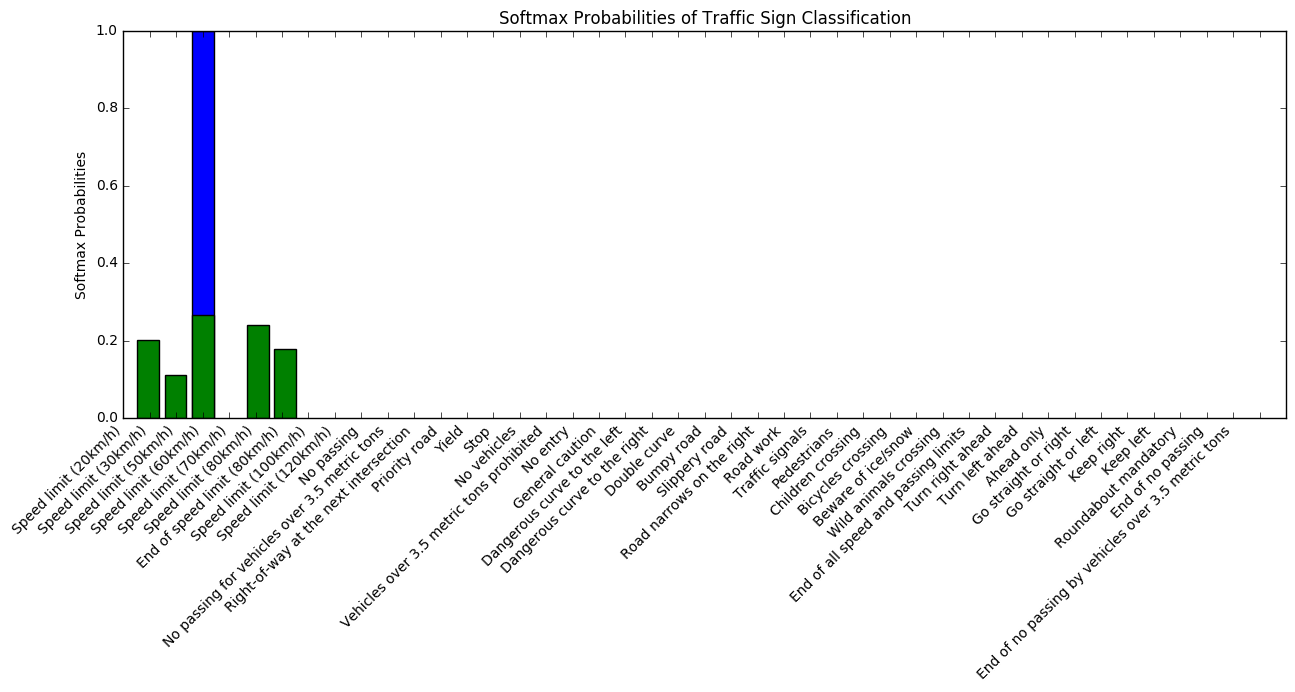

Prediction for the New Image 2
The Correct Index should be 12
Predicted Index is 12


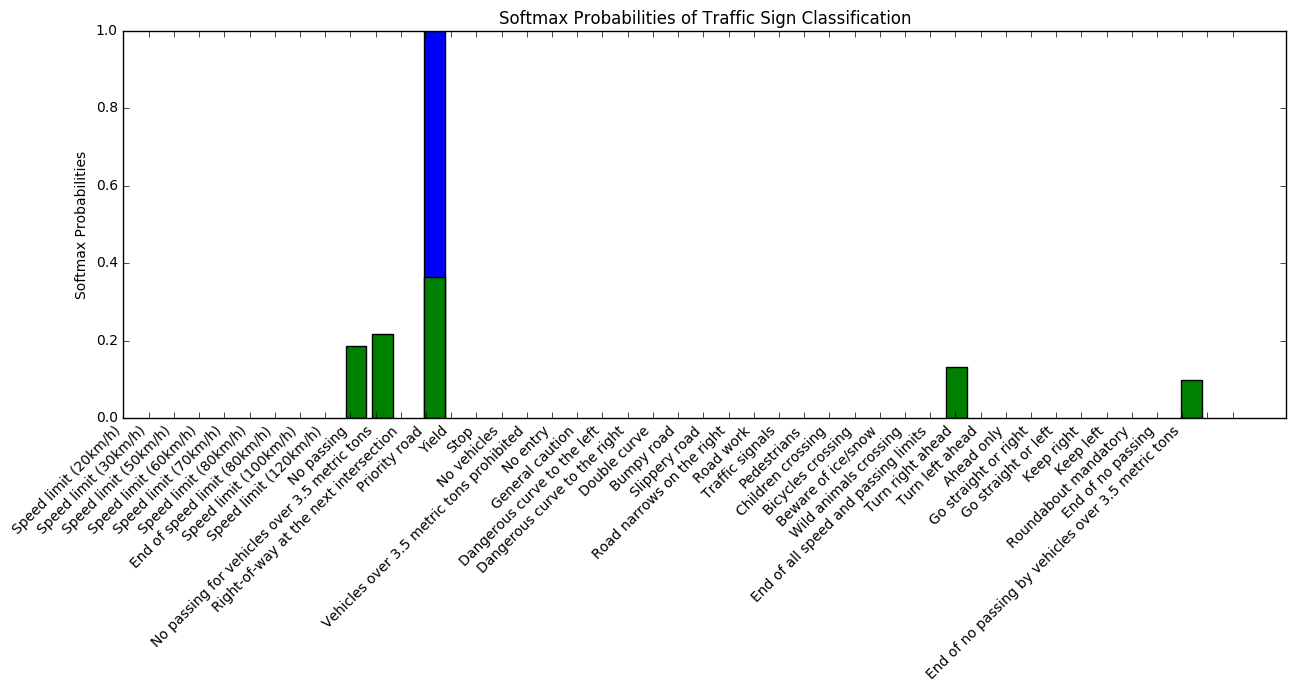

Prediction for the New Image 3
The Correct Index should be 13
Predicted Index is 13


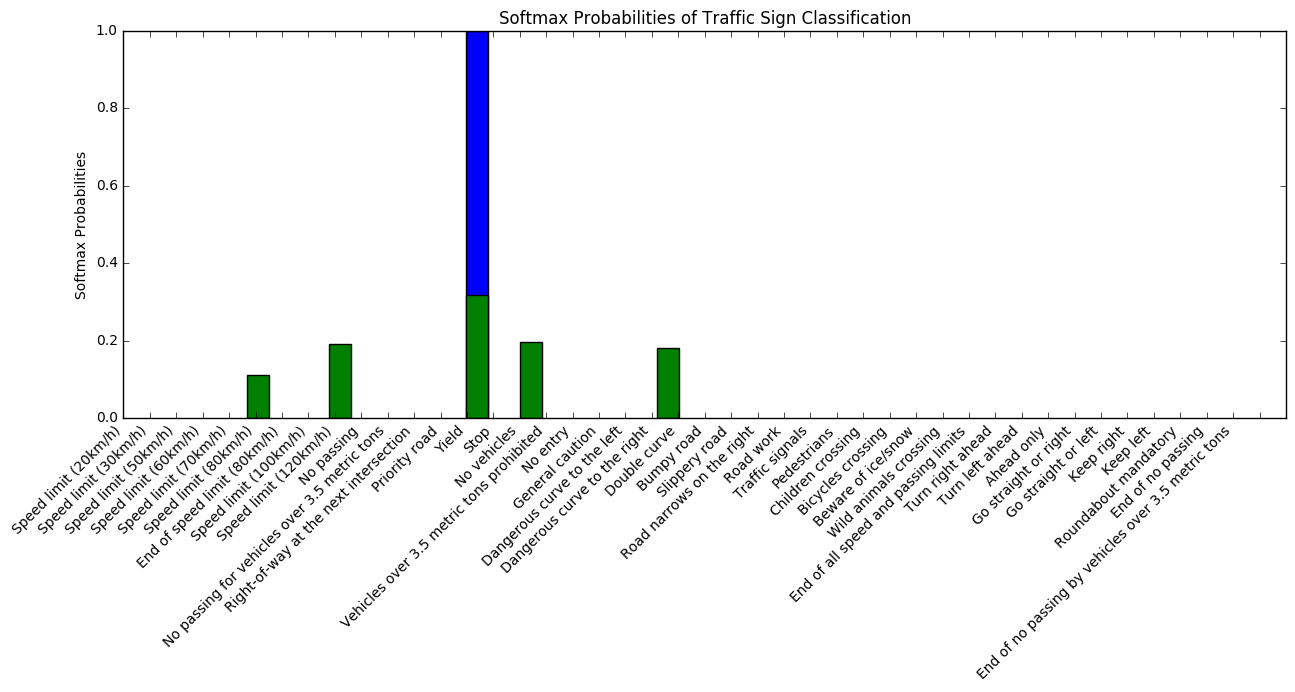

Prediction for the New Image 4
The Correct Index should be 17
Predicted Index is 17


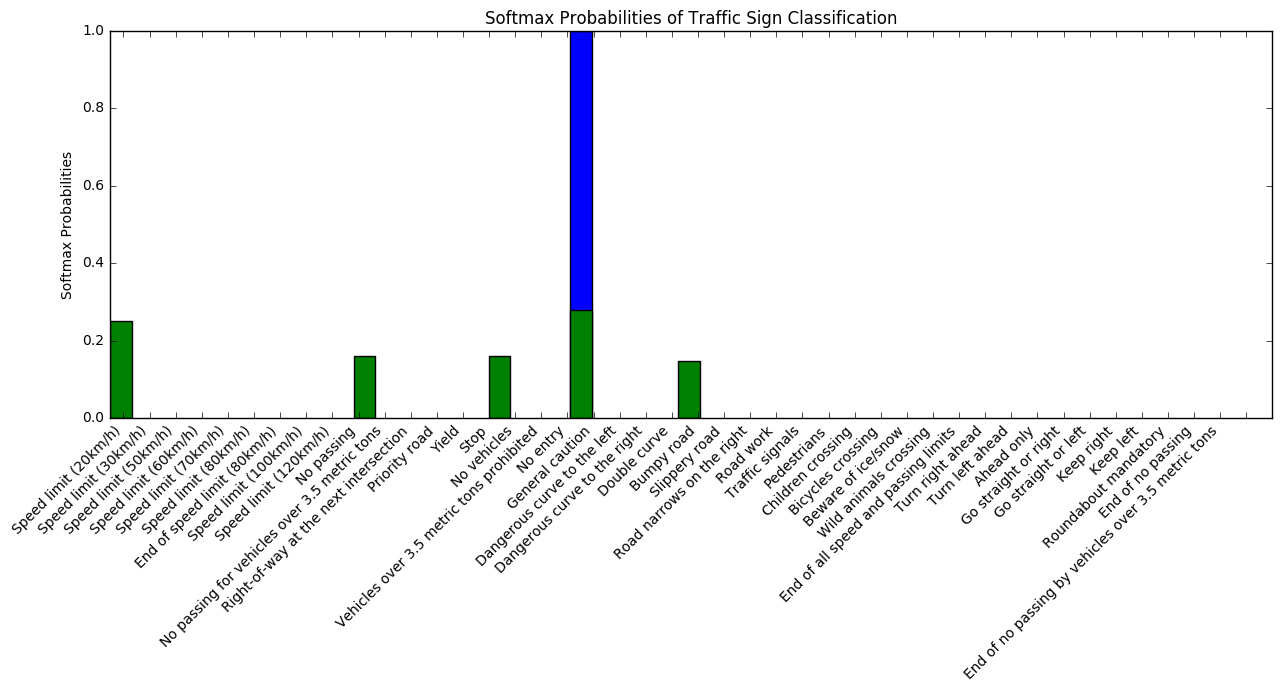

Prediction for the New Image 5
The Correct Index should be 37
Predicted Index is 37


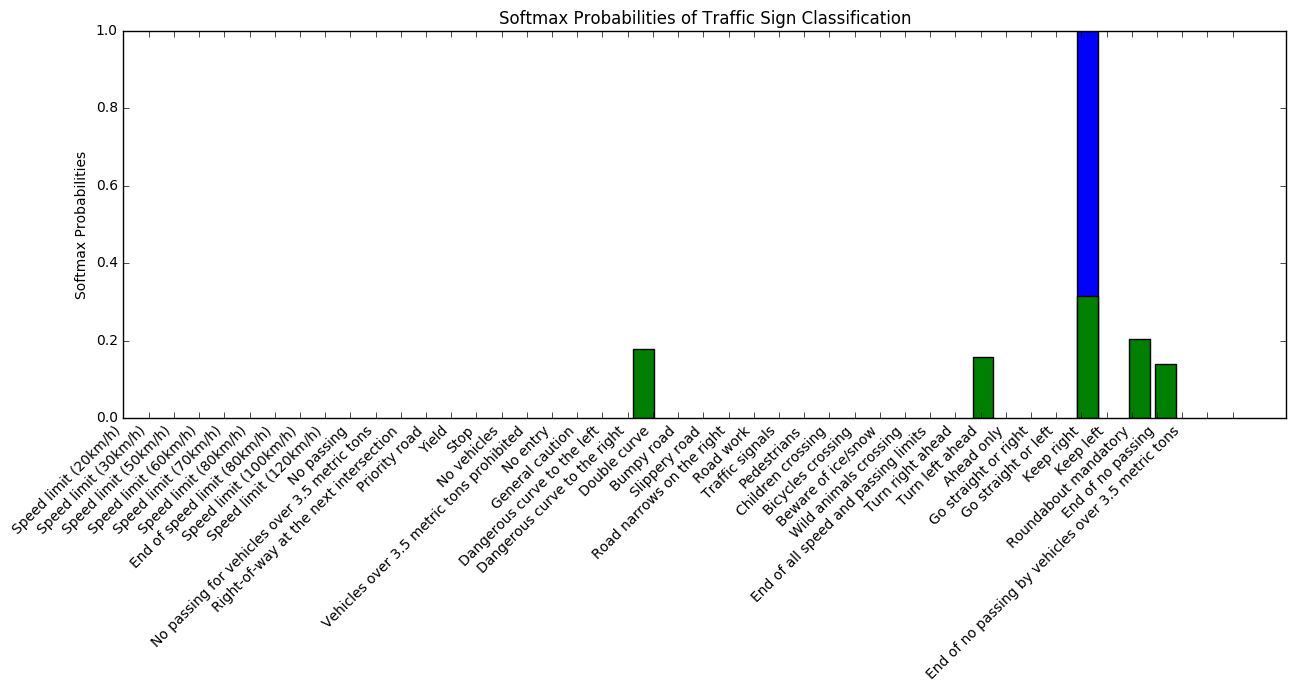

Prediction for the New Image 6
The Correct Index should be 38
Predicted Index is 38


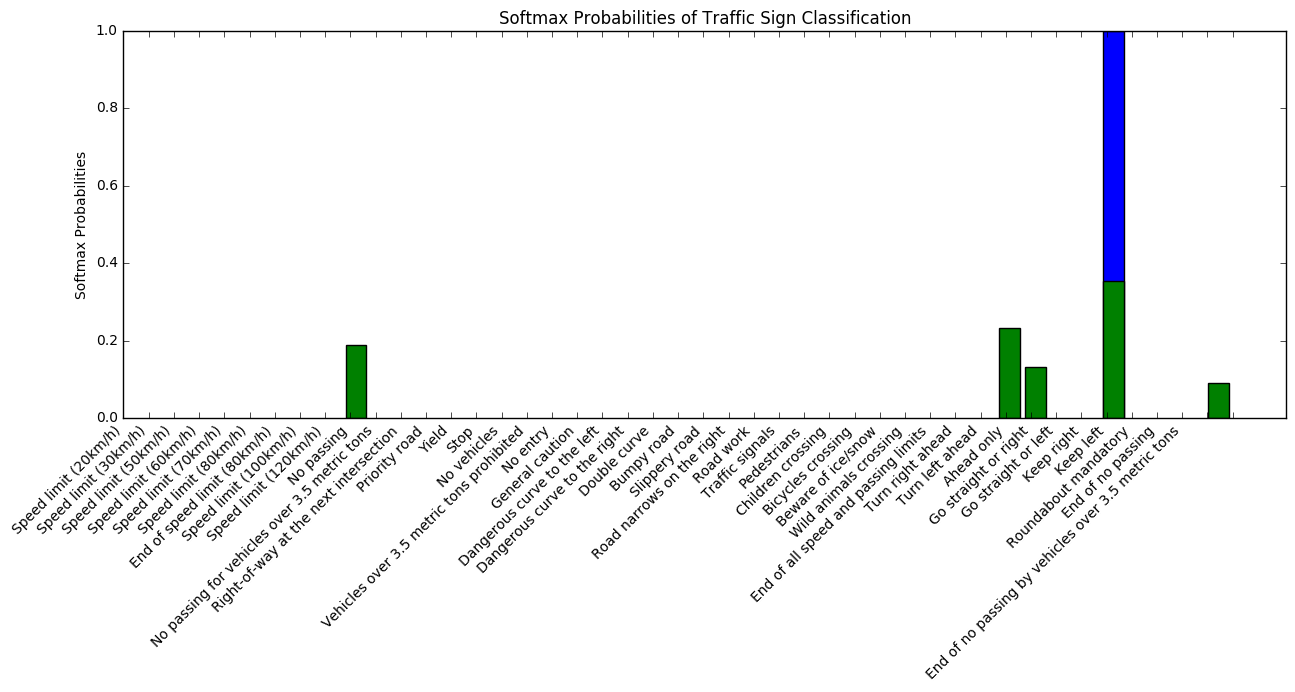

In [20]:
# ANALYZE PERFORMANCE
# Run Session to Compute Softmax Probabilities for Each Image
with tf.Session() as Sess:
    # Load Model
    Saver.restore(Sess,'Model/Lenet')
    
    # Visualize the Prediction
    for i in range(len(YTest)):
        print("Prediction for the New Image {:1d}".format(i+1))
        MaxSoftmaxPlot(i)

#### Analyze Feature Maps

In [21]:
# ANALYZE FEATURE MAPS
# Define a Function to Output Feature Maps
def OutputFeatureMap(ImageInput,TFActivation,ActivationMin=-1,ActivationMax=-1,PltNum=1):
    Activation=TFActivation.eval(session=Sess,feed_dict={X:ImageInput})
    Featuremaps=Activation.shape[3]
    plt.figure(PltNum,figsize=(15,15))
    plt.title('FeatureMaps')
    for Featuremap in range(Featuremaps):
        plt.subplot(10,5,Featuremap+1) 
        if ActivationMin!=-1 & ActivationMax!=-1:
            plt.imshow(Activation[0,:,:,Featuremap],interpolation="nearest",
                       vmin=ActivationMin,vmax=ActivationMax)
        elif ActivationMax!=-1:
            plt.imshow(Activation[0,:,:,Featuremap],interpolation="nearest",vmax=ActivationMax)
        elif ActivationMin!=-1:
            plt.imshow(Activation[0,:,:,Featuremap],interpolation="nearest",vmin=ActivationMin)
        else:
            plt.imshow(Activation[0,:,:,Featuremap],interpolation="nearest")

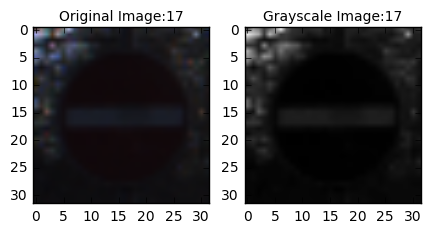

In [22]:
# ANALYZE FEATURE MAPS
# Select a Random Image to Visualize
Index=random.randint(0,NumTrain)
TestImage=XTrain[Index]

# Convert to Grayscale Image
Gray=cv2.cvtColor(TestImage,cv2.COLOR_BGR2GRAY)
    
# Plot
Fig,(Axis1,Axis2)=plt.subplots(1,2,figsize=(5,5))
Axis1.imshow(TestImage)
Axis2.imshow(Gray,cmap='gray')
Axis1.set_title('Original Image:'+str(YTrain[Index]),fontsize=10)
Axis2.set_title('Grayscale Image:'+str(YTrain[Index]),fontsize=10)

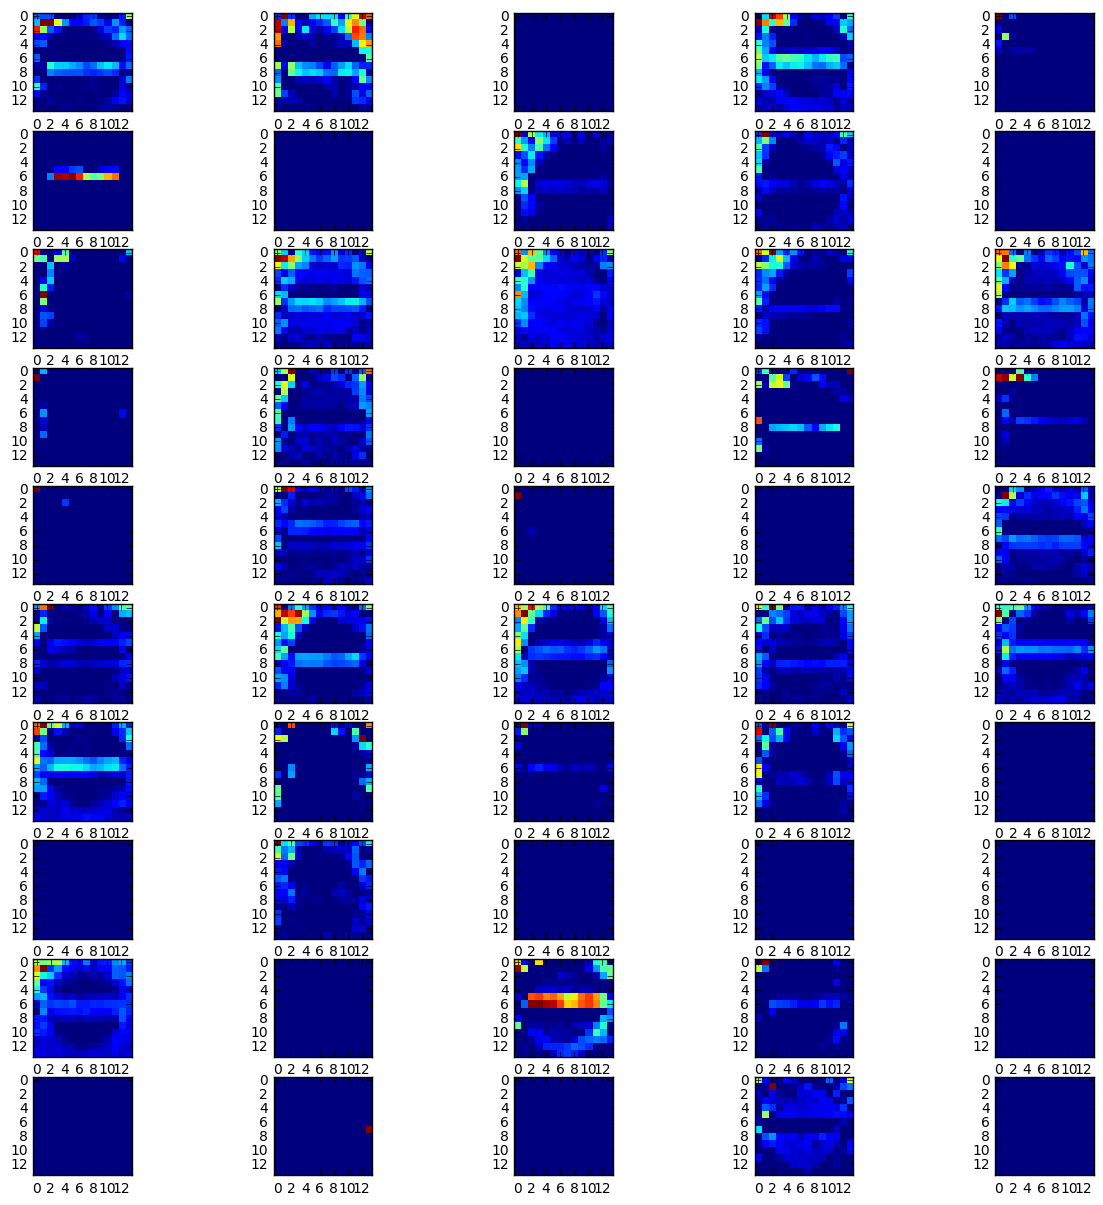

In [23]:
# ANALYZE FEATURE MAPS
# Reshape Data
TestImage=np.reshape(TestImage,(1,32,32,3))
# Visualize
with tf.Session() as Sess:
    # Load Model
    Saver.restore(Sess,'Model/Lenet')
    # Plot Learned Kernels
    OutputFeatureMap(TestImage,Conv1,-1,-1,1)